In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('epi_r.csv')

In [3]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

In [4]:
raw_data.quantile([.01, .99])

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0.01,0.0,18.00,0.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.99,5.0,3238.64,171.22,207.64,5676.64,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [5]:
feature_df = raw_data[raw_data['calories'] < 3238.64].copy()
feature_df = feature_df[feature_df['sodium'] < 5676.64].copy()
feature_df = feature_df[feature_df['protein'] < 171.22].copy()
feature_df = feature_df[feature_df['fat'] < 207.64].copy()

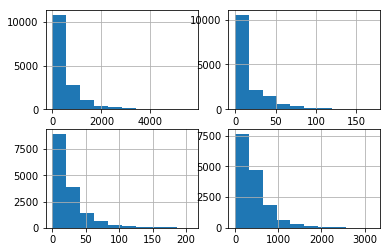

In [6]:
fig, axes = plt.subplots(2, 2)
axes_f = axes.flatten()
feature_df['sodium'].hist(ax=axes_f[0])
feature_df['protein'].hist(ax=axes_f[1])
feature_df['fat'].hist(ax=axes_f[2])
feature_df['calories'].hist(ax=axes_f[3])

In [7]:
feature_df.sum(numeric_only=True) \
          .drop(['rating', 'sodium', 'fat', 'calories', 'protein']) \
          .quantile([.1, .9])

0.1      2.0
0.9    636.7
dtype: float64

In [8]:
frequent_columns = feature_df.sum(numeric_only=True) \
        [feature_df.sum(numeric_only=True)>500].index

In [9]:
feature_df = feature_df[frequent_columns]

In [10]:
feature_df.iloc[:, 5:] = feature_df.iloc[:, 5:].astype('uint8')

In [11]:
feature_df.head()

,rating,calories,protein,fat,sodium,alcoholic,appetizer,apple,backyard bbq,bake,...,summer,thanksgiving,tomato,tree nut free,vegan,vegetable,vegetarian,vinegar,wheat/gluten-free,winter
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
feature_df['top_notch'] = feature_df['rating'] >= 4

In [13]:
feature_df['top_notch'].sum()

8420

In [14]:
feature_df.groupby('top_notch').mean()

,rating,calories,protein,fat,sodium,alcoholic,appetizer,apple,backyard bbq,bake,...,summer,thanksgiving,tomato,tree nut free,vegan,vegetable,vegetarian,vinegar,wheat/gluten-free,winter
top_notch,,,,,,,,,,,,,,,,,,,,,
False,2.842971,398.157455,15.998724,21.605159,467.854167,0.052012,0.063634,0.032455,0.033588,0.223073,...,0.201672,0.055130,0.103458,0.334751,0.107851,0.117063,0.360402,0.032455,0.247874,0.157313
True,4.525238,460.241805,19.400238,26.433967,536.360451,0.026128,0.068765,0.034561,0.049881,0.245606,...,0.211520,0.090618,0.108907,0.370428,0.081829,0.098337,0.348219,0.037886,0.245962,0.164608


In [15]:
feature_df['norm_calories'] = (feature_df['calories'] - feature_df['calories'].mean()) /\
                                feature_df['calories'].std()
feature_df['norm_protein'] = (feature_df['protein'] - feature_df['protein'].mean()) /\
                                feature_df['protein'].std()
feature_df['norm_fat'] = (feature_df['fat'] - feature_df['fat'].mean()) /\
                                feature_df['fat'].std()
feature_df['norm_sodium'] = (feature_df['sodium'] - feature_df['sodium'].mean()) /\
                                feature_df['sodium'].std()   
feature_df = feature_df.drop(['calories', 'fat', 'protein', 'sodium'], axis=1)

In [16]:
top_notch_means = feature_df.groupby('top_notch').mean().drop(['rating'],axis=1)
col_batch = np.absolute(top_notch_means.iloc[0] - top_notch_means.iloc[1]) \
    .sort_values(ascending=False)[:30].index

In [17]:
col_batch

Index(['norm_fat', 'norm_calories', 'norm_protein', 'norm_sodium',
       'bon appétit', 'soy free', 'peanut free', 'gourmet', 'quick & easy',
       'tree nut free', 'thanksgiving', 'drink', 'fall', 'dinner', 'roast',
       'cocktail party', 'dessert', 'vegan', 'alcoholic', 'bake', 'christmas',
       'grill/barbecue', 'fruit', 'vegetable', 'side', 'pasta', 'pescatarian',
       'backyard bbq', 'dairy free', 'vegetarian'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
train, test = train_test_split(feature_df, test_size=0.2, random_state=42)
X_test = test[col_batch]
Y_test = test['top_notch']
X_train = train[col_batch]
Y_train = train['top_notch']

In [19]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
c_values = [.25, .5, 1, 2, 4, 8, 16]
for c in c_values:
    svc = SVC(C=c)
    svc.fit(X_train, Y_train)
    print(c, svc.score(X_train, Y_train), svc.score(X_test, Y_test))

0.25 0.5833602584814217 0.5791343669250646
0.5 0.5895799676898223 0.5862403100775194
1 0.5945072697899838 0.5927002583979328
2 0.6026655896607431 0.5981912144702842
4 0.6087237479806139 0.5998062015503876
8 0.6187399030694669 0.601421188630491
16 0.6274636510500807 0.5936692506459949


In [28]:
svc = SVC(C=2)
svc.fit(X_train, Y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
svc.score(X_train, Y_train)

0.6026655896607431

In [30]:
svc.score(X_test, Y_test)

0.5981912144702842

    When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

    There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

    After all, people who eat chocolate _might_ just be happier people.

A lot of the features that have the most variance relative to the "top_notch" feature I created for classifying have to do with very particular dietary preferences/restrictions. For example, soy free, peanut free, vegan, vegetarian, etc. 

The most concerning things for bias is that the ratings don't seem to be dsitributed in any reasonable way from 0 to 5, suggesting that the website draws very particular kinds of visitors. 

I wouldn't try to generalize this model outside of the users of this website.